# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [146]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `numpy` и `matplotlib`.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [147]:
def theta(X, Y, alpha):
    return np.linalg.inv(X.T @ X + alpha * np.identity(X.shape[1])) @ X.T @ Y 

In [148]:
def error(X, Y, alpha, theta):
    return np.sqrt(np.sum(np.square(np.sum(theta*X, axis=1) - Y))/Y.shape[0])

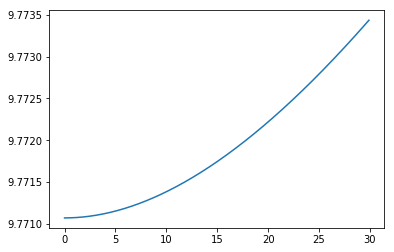

In [149]:
alphas = np.arange(0, 30, 0.1)
dy = [error(X, Y, a, theta(X, Y, a)) for a in alphas] 
plt.plot(alphas, dy) 
plt.show()

In [150]:
min_error = float('inf')
best_alpha = -1
step = len(Y) // folds

training = list()
validation = list()
curr_train = list()
curr_test = list()
for alpha in alphas:    
    for fold in range(folds):
        X_train = np.vstack((X[0:step*fold,:], X[step*(fold + 1):,:]))
        Y_train = np.concatenate((Y[0:step*fold], Y[step*(fold + 1):]))
        X_test = X[step*fold:step*(fold + 1),:]
        Y_test = Y[step*fold:step*(fold + 1)]      
        curr_test.append(error(X_test, Y_test, alpha, theta(X_train, Y_train, alpha)))
        curr_train.append(error(X_train, Y_train, alpha, theta(X_train, Y_train, alpha)))
    
    training.append(np.mean(curr_train))
    validation.append(np.mean(curr_test)) 
    if np.mean(curr_test) < min_error:
        best_alpha = alpha
        min_error = np.mean(curr_test)

In [151]:
print(best_alpha)

6.7


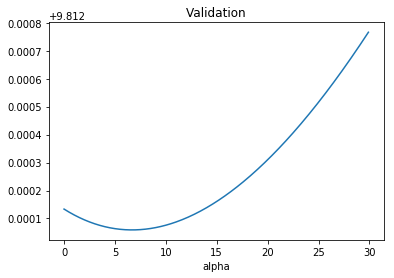

In [152]:
plt.xlabel('alpha')
plt.title('Validation')
plt.plot(alphas, validation)
plt.show()

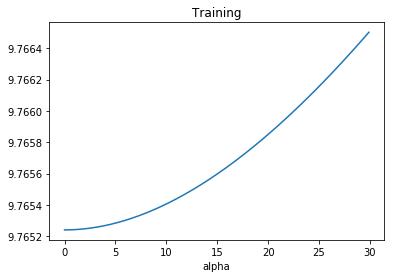

In [153]:
plt.xlabel('alpha')
plt.title('Training')
plt.plot(alphas, training)
plt.show()